In [3]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

# Importation des images
TO DO, FFN with transfer learning and then apply a Xgboost

## Création d'une fonction pour scanner un répertoire

In [1]:
def scan_size(path_im):
    images = {}
    for path in path_im[:12500]:
        # récupération nom de l'image
        im_name = os.path.basename(path)
        
        # récupération des images
        img = cv2.imread(path)
        images[int(im_name[:-4])] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return images

In [2]:
im_path = glob.glob('./images_training_rev1/new_images')

NameError: name 'glob' is not defined

In [4]:
images = scan_size(im_path)

In [5]:
images_id = list(images.keys())

## Récupération des outputs correspondants aux images chargées

In [6]:
Y_trainfull = pd.read_csv('./csv/max_benchmark.csv', index_col=0)

In [7]:
Y_trainfull = Y_trainfull.loc[images_id, :]
Y_trainfull

,shape_Class1.1,shape_Class1.2,shape_Class1.3
GalaxyID,,,
100008,0,1,0
100023,0,1,0
100078,1,0,0
100090,1,0,0
100122,1,0,0
...,...,...,...
307666,0,1,0
307671,1,0,0
307681,0,1,0


## Aperçu des classes de galaxies

In [8]:
Y_trainfull.sum()

shape_Class1.1    5443
shape_Class1.2    7053
shape_Class1.3       4
dtype: int64

# Séparation des données en ensembles d'entraînement et de validation

In [9]:
X_train_id, x_val_id, Y_train, y_val = train_test_split(images_id, Y_trainfull, test_size=0.2, random_state=15)

In [10]:
def images_from_id(images_id, images):
    images_selected = []
    
    for image_id in images_id:
        images_selected += [images[image_id]]
    
    return images_selected

In [11]:
X_train = images_from_id(X_train_id, images)
x_val = images_from_id(x_val_id, images)

In [12]:
X_train = np.array(X_train)
x_val = np.array(x_val)
Y_train = np.array(Y_train)
y_val = np.array(y_val)
X_train.shape

(10000, 66, 66, 3)

In [13]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1]*x_val.shape[2]*x_val.shape[3]))

In [14]:
print(X_train.shape)
print(x_val.shape)
print(Y_train.shape)
print(y_val.shape)

(10000, 13068)
(2500, 13068)
(10000, 3)
(2500, 3)


In [15]:
Y_train = Y_train.argmax(axis=1)
y_val = y_val.argmax(axis=1)

# Création d'un modèle type arbre de décision

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_predict = model.predict(x_val)

[[3122 1614    2]
 [1509 4756    1]
 [   5    2    0]]


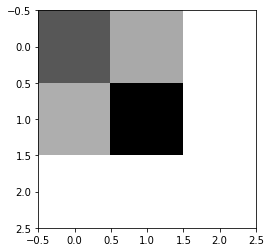

In [18]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [19]:
print(metrics.accuracy_score(y_predict, y_val)*100, "%")

71.54663518299881 %


# Création d'un modèle type ensemble

In [20]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_predict = model.predict(x_val)

[[3570  948    2]
 [1065 5424    1]
 [   1    0    0]]


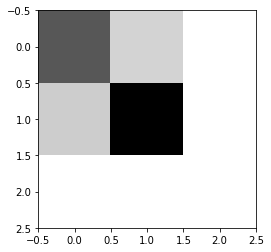

In [22]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [23]:
print(metrics.accuracy_score(y_predict, y_val)*100, "%")

81.68195440922713 %


# Création d'un modèle type arbres de décision - méthode boosting

In [16]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
y_predict = model.predict(x_val)

[[ 793  292]
 [ 253 1162]]


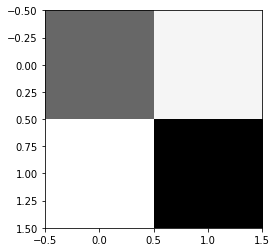

In [18]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [19]:
print(metrics.accuracy_score(y_predict, y_val)*100, "%")

78.2 %


# Conclusions

Performances obtenues :
- arbre de décision -> 70% (4 000 images d'entraînement), 72% (44 000 images)
- random forest -----> 80% ( -------------------------------------- ), 82% ( ------------------ )
- boosting ------------> 78% ( -------------------------------------- ), 78% (10 000 images)